In [57]:
# visualizations for voting trends based on game results

import pandas as pd 
from matplotlib.pyplot import bar_label

In [58]:
# bring in the data
data = pd.read_csv("mock_response_data.csv", header=0)


In [63]:
election_df = data.groupby('vote').size()
election_df.head()

vote
biden    29
trump    20
dtype: int64

In [59]:
# transform the raw data to aggregated
df = data.groupby(['category', 'vote']).size().reset_index()
df = df.pivot(index='category', columns='vote', values=0)
df = df.fillna(0)
df['total_count_questions_asked'] = df['biden'] + df['trump']
df = df.sort_values(by=['total_count_questions_asked'])
totals_df = df.drop(['biden', 'trump'], axis=1)
df = df.drop('total_count_questions_asked', axis=1)

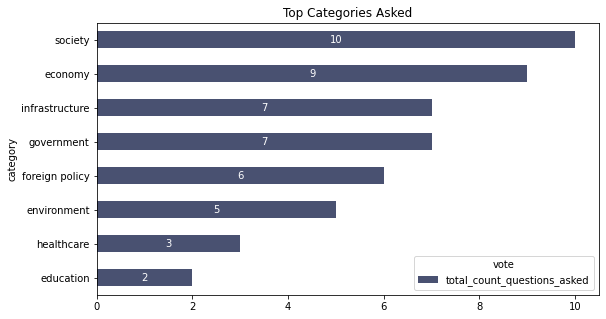

In [60]:
ax = totals_df.plot(kind='barh', figsize=(9, 5), color=['#495171'], title="Top Categories Asked")
#ax.bar_label(ax.containers[0])
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{v.get_width():0.0f}' for v in c]
    # add annotations
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

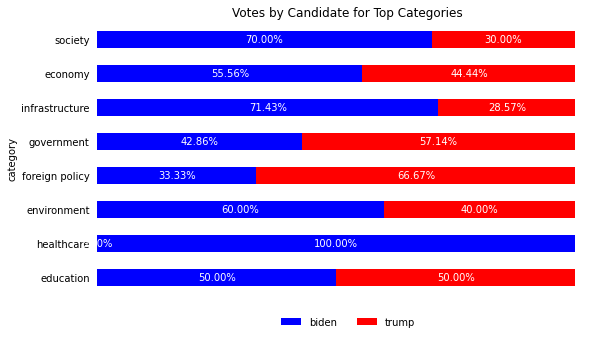

In [61]:
# get the totals for each row
totals = df.sum(axis=1)

# calculate the percent for each row
percent = df.div(totals, axis=0).mul(100).round(2)

# create the plot
ax = percent.plot(kind='barh', stacked=True, figsize=(9, 5), color=['blue', 'red'], xticks=[], title="Votes by Candidate for Top Categories")
# move the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2, frameon=False)

# remove ticks
ax.tick_params(left=False, bottom=False)
# remove all spines
ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)

# iterate through each container
for c in ax.containers:
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{v.get_width():0.2f}%' for v in c]
    # add annotations
    ax.bar_label(c, labels=labels, label_type='center', padding=0.3, color='w')

In [62]:
# to export this notebook to html, use this command in terminal: jupyter nbconvert --to html --no-input voting_viz.ipynb